### シグモイド関数、恒等関数、各層の重みとバイアスを初期化する関数の作成

In [1]:
import numpy as np

def sigmoid(x):
    '''
    シグモイド関数
    Parameters:
        x(array): レイヤーへの入力値
    '''
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    '''
    恒等関数
    Parameters:
        x(array): レイヤーへの入力値
    '''
    return x

def init_paraml():
    '''
    重みとバイアスの初期化を行う
    '''
    parameters = {}
    # 入力層→第1層
    # 第1層のニューロン数＝3
    parameters['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    # 第1層のバイアス
    parameters['b1'] = np.array([0.1, 0.2, 0.3])

    # 第1層→第2層
    # 第2層のニューロン数＝2
    parameters['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6],
    ])
    # 第2層のバイアス
    parameters['b2'] = np.array([0.1, 0.2])

    # 第2層→出力層
    # 出力層のニューロン数＝2
    parameters['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4],
    ])
    # 第2層のバイアス
    parameters['b3'] = np.array([0.1, 0.2])

    return parameters

In [2]:
# 重みとバイアスを初期化して行列とベクトルに格納
param = init_paraml()
W1, W2, W3 = param['W1'], param['W2'], param['W3']
b1, b2, b3 = param['b1'], param['b2'], param['b3']

In [3]:
# 入力層の信号
x = np.array([1.0, 0.5])
print(x)

[1.  0.5]


In [4]:
# 第1層の処理
a1 = np.dot(x, W1) + b1
print(a1)
z1 = sigmoid(a1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [5]:
# 第2層の処理
a2 = np.dot(z1, W2) + b2
print(a2)
z2 = sigmoid(a2)
print(z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [6]:
# 第3層の処理
a3 = np.dot(z2, W3) + b3
print(a3)
z3 = identity_function(a3)
print(z3)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [7]:
# 隠れ層の誤差を求める
e2_1 = 0.8
e2_2 = 0.5

w2_11 = 2.0
w2_21 = 1.0
w2_12 = 3.0
w2_22 = 4.0

# 最終出力の誤差
e3 = np.array([e2_1, e2_2])

# 出力層の重みに分配する誤差
e2 = np.array([
    [w2_11 / (w2_11 + w2_12), w2_21 / (w2_21 + w2_22)],
    [w2_12 / (w2_11 + w2_12), w2_22 / (w2_21 + w2_22)]
])
print(np.dot(e2, e3))

[0.42 0.88]


In [8]:
# 正規化因子を取り除いた状態で、隠れ層の誤差を求める
W2 = np.array([
    [w2_11, w2_21],
    [w2_12, w2_22]
])
print(np.dot(W2, e3))

[2.1 4.4]


### ニューラルネットワーククラスの作成

In [12]:
class neuralNetwork:
    '''
    ニューラルネットワークを生成する
    Attributes:
        input(int): 入力層のニューロン数
        fc1(int): 隠れ層のニューロン数
        fc2(int): 出力層のニューロン数
        lr(float): 学習率
        w1(array): 隠れ層のバイアス、重み行列
        w2(array): 出力層のバイアス、重み行列
    '''
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate):
        '''
        ニューラルネットワークの初期化を行う
        Parameters:
            input_dim(int): 入力層のニューロン数
            hiddeninput_dim(int): 隠れ層層のニューロン数
            output_dim(int): 出力層のニューロン数
            learning_rate(float): 学習率
        '''
        # 入力層、隠れ層、出力層のニューロン数をインスタンス変数に代入
        self.input = input_dim
        self.fc1 = hidden_dim
        self.fc2 = output_dim
        self.lr = learning_rate
        self.weight_initializer()
    
    def weight_initializer(self):
        '''
        重みとバイアスの初期化を行う
        '''
        # 隠れ層の重みとバイアスを初期化
        self.w1 = np.random.normal(
            0.0, # 平均は0
            pow(self.input, -0.5), # 標準偏差は入力層のニューロン数を元に計算
            (self.fc1, self.input + 1) # 行数は隠れ層のニューロン数、列数は入力層のニューロン数　+ 1
        )
        # 出力層の重みとバイアスを初期化
        self.w2 = np.random.normal(
            0.0, # 平均は0
            pow(self.fc1, -0.5), # 標準偏差は隠れ層のニューロン数を元に計算
            (self.fc2, self.fc1 + 1) # 行数は出力層のニューロン数、列数は隠れ層のニューロン数　+ 1
        )
    
    def sigmoid(self, x):
        '''
        シグモイド関数
        Parameters:
            x(array): 関数を適用するデータ
        '''
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x):
        '''
        ソフトマックス関数
        Parameters:
            x(array): 関数を適用するデータ
        '''
        c = np.max(x)
        exp_x = np.exp(x - c)
        sum_exp_x = np.sum(exp_x)
        y = exp_x / sum_exp_x
        return y
    
    def train(self, train_x, train_y):
        '''
        ニューラルネットワークの学習を行う
        Parameters:
            train_x(array): 訓練データ
            train_y(array): 正解ラベル
        '''
        # [入力層]
        # 入力値の配列にバイアス項を追加して入力層から出力する
        inputs = np.array(
            np.append(train_x, [1]), # 配列の末尾にバイアスのために「1」を追加
            ndmin=2 # 2次元化
        ).T # 転置して1列の行列にする

        # [隠れ層]
        # 入力層の出力に重み、バイアスを適用して隠れ層に入力する
        hidden_inputs = np.dot(
            self.w1, # 隠れ層の重み
            inputs # 入力層の出力
        )

        # シグモイド関数を適用して隠れ層から出力
        hidden_outputs = self.sigmoid(hidden_inputs)

        # 隠れ層の出力行列の末尾にバイアスのための「1」を追加
        hidden_outputs = np.append(
            hidden_outputs, # 隠れ層の出力行列
            [[1]], # 2次元形式でバイアス値を追加
            axis=0 # 行を指定（列は1）
        )

        # [出力層]
        # 出力層への入力信号を作る
        final_inputs = np.dot(
            self.w2, # 隠れ層と出力層の間の重み
            hidden_outputs # 隠れ層の出力
        )

        # ソフトマックス関数を適用して出力層から出力する
        final_outputs = self.softmax(final_inputs)

        print(final_outputs)
        print(sum(final_outputs))

In [13]:
# neuralNetworkをインスタンス化してtrain()メソッドを実行する
input_dim = 3
hidden_dim = 3
output_dim = 3
learning_rate = 0.1

# neuralNetworkオブジェクトの作成
n = neuralNetwork(input_dim, hidden_dim, output_dim, learning_rate)

input_list = [1.0, 1.5, 2.0]
target_list = [1.0, 1.5, 2.0]
n.train(input_list, target_list)

[[0.24599874]
 [0.28346592]
 [0.47053534]]
[1.]


In [27]:
class neuralNetwork:
    '''
    ニューラルネットワークを生成する
    Attributes:
        input(int): 入力層のニューロン数
        fc1(int): 隠れ層のニューロン数
        fc2(int): 出力層のニューロン数
        lr(float): 学習率
        w1(array): 隠れ層のバイアス、重み行列
        w2(array): 出力層のバイアス、重み行列
    '''
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate):
        '''
        ニューラルネットワークの初期化を行う
        Parameters:
            input_dim(int): 入力層のニューロン数
            hiddeninput_dim(int): 隠れ層層のニューロン数
            output_dim(int): 出力層のニューロン数
            learning_rate(float): 学習率
        '''
        # 入力層、隠れ層、出力層のニューロン数をインスタンス変数に代入
        self.input = input_dim
        self.fc1 = hidden_dim
        self.fc2 = output_dim
        self.lr = learning_rate
        self.weight_initializer()
    
    def weight_initializer(self):
        '''
        重みとバイアスの初期化を行う
        '''
        # 隠れ層の重みとバイアスを初期化
        self.w1 = np.random.normal(
            0.0, # 平均は0
            pow(self.input, -0.5), # 標準偏差は入力層のニューロン数を元に計算
            (self.fc1, self.input + 1) # 行数は隠れ層のニューロン数、列数は入力層のニューロン数　+ 1
        )
        # 出力層の重みとバイアスを初期化
        self.w2 = np.random.normal(
            0.0, # 平均は0
            pow(self.fc1, -0.5), # 標準偏差は隠れ層のニューロン数を元に計算
            (self.fc2, self.fc1 + 1) # 行数は出力層のニューロン数、列数は隠れ層のニューロン数　+ 1
        )
    
    def sigmoid(self, x):
        '''
        シグモイド関数
        Parameters:
            x(array): 関数を適用するデータ
        '''
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x):
        '''
        ソフトマックス関数
        Parameters:
            x(array): 関数を適用するデータ
        '''
        c = np.max(x)
        exp_x = np.exp(x - c)
        sum_exp_x = np.sum(exp_x)
        y = exp_x / sum_exp_x
        return y
    
    def train(self, train_x, train_y):
        '''
        ニューラルネットワークの学習を行う
        Parameters:
            train_x(array): 訓練データ
            train_y(array): 正解ラベル
        '''
        # [入力層]
        # 入力値の配列にバイアス項を追加して入力層から出力する
        inputs = np.array(
            np.append(train_x, [1]), # 配列の末尾にバイアスのために「1」を追加
            ndmin=2 # 2次元化
        ).T # 転置して1列の行列にする

        # [隠れ層]
        # 入力層の出力に重み、バイアスを適用して隠れ層に入力する
        hidden_inputs = np.dot(
            self.w1, # 隠れ層の重み
            inputs # 入力層の出力
        )

        # シグモイド関数を適用して隠れ層から出力
        hidden_outputs = self.sigmoid(hidden_inputs)

        # 隠れ層の出力行列の末尾にバイアスのための「1」を追加
        hidden_outputs = np.append(
            hidden_outputs, # 隠れ層の出力行列
            [[1]], # 2次元形式でバイアス値を追加
            axis=0 # 行を指定（列は1）
        )

        # [出力層]
        # 出力層への入力信号を作る
        final_inputs = np.dot(
            self.w2, # 隠れ層と出力層の間の重み
            hidden_outputs # 隠れ層の出力
        )

        # ソフトマックス関数を適用して出力層から出力する
        final_outputs = self.softmax(final_inputs)

        # バックプロパゲーション（出力層）
        # 正解ラベルの配列を1列の行列に変換する
        targets = np.array(
            train_y, # 正解ラベルの配列
            ndmin=2 # 2次元化
        ).T
        # 出力値と正解ラベルとの誤差
        output_errors = final_outputs - targets
        # 出力層の入力誤差を求める
        delta_ouotput = output_errors * (1 - final_outputs) * final_outputs
        # 重みを更新する前に隠れ層の出力誤差を求めておく
        hidden_errors = np.dot(
            self.w2.T, # 出力層の重み行列を転置する
            delta_ouotput # 出力層の入力誤差
        )
        # 出力層の重み、バイアスの更新
        self.w2 -= self.lr * np.dot(
            # 出力誤差 * (1 - 出力信号) * 出力信号
            delta_ouotput,
            # 隠れ層の出力行列を転置
            hidden_outputs.T
        )

        # バックプロパゲーション（隠れ層）
        # 逆伝播された隠れ層の出力誤差からバイアスのものを取り除く
        hidden_errors_nobias = np.delete(
            hidden_errors, # 隠れ層のエラーの行列
            self.fc1, # 隠れ層のニューロン数をインデックスにして末尾要素を削除
            axis=0 # 行の削除を指定
        )
        # 隠れ層の出力行列からバイアスを除く
        hidden_outputs_nobias = np.delete(
            hidden_outputs, # 隠れ層のエラーの行列
            self.fc1, # 隠れ層のニューロン数をインデックスにして末尾要素を削除
            axis=0 # 行の削除を指定
        )
        # 隠れ層の重み、バイアスの更新
        self.w1 -= self.lr * np.dot(
            # 逆伝播された隠れ層の出力誤差 * (1 - 隠れ層の出力) * 隠れ層の出力
            hidden_errors_nobias * (
                1.0 - hidden_outputs_nobias
             ) * hidden_outputs_nobias,
            # 入力層の出力信号の行列を転置
            inputs.T
        )

    def evaluate(self, inputs_list):
        '''
        学習した重みでテストデータを評価する
        Parameters:
            input_list(array): テスト用データ
        Returns:
            array: モデルからの出力
        '''
        # [入力層]
        # 入力値の配列にバイアス項を追加して入力層から出力する
        inputs = np.array(
            np.append(inputs_list, [1]), # 配列の末尾にバイアスの「1」を追加
            ndmin=2 # 2次元化
        ).T # 転置して1列の行列にする

        # [隠れ層]
        # 入力層の出力に重み、バイアスを適用して隠れ層に入力する
        hidden_inputs = np.dot(
            self.w1,
            inputs
        )
        # 活性化関数を適用して隠れ層から出力する
        hidden_outputs = self.sigmoid(hidden_inputs)

        # [出力層]
        # 出力層への入力信号を計算
        final_inputs = np.dot(
            self.w2, # 隠れそうと出力層の間の重み
            np.append(hidden_outputs, [1]) # 隠れ層の出力配列の末尾にバイアスの「1」を追加
        )
        # 活性化関数を適用して出力層から出力する
        final_outputs = self.softmax(final_inputs)

        # 出力層からの出力を戻り値として返す
        return final_outputs

In [ ]:
# Fashion-MNISTデータセットをダウンロードして変数に代入
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


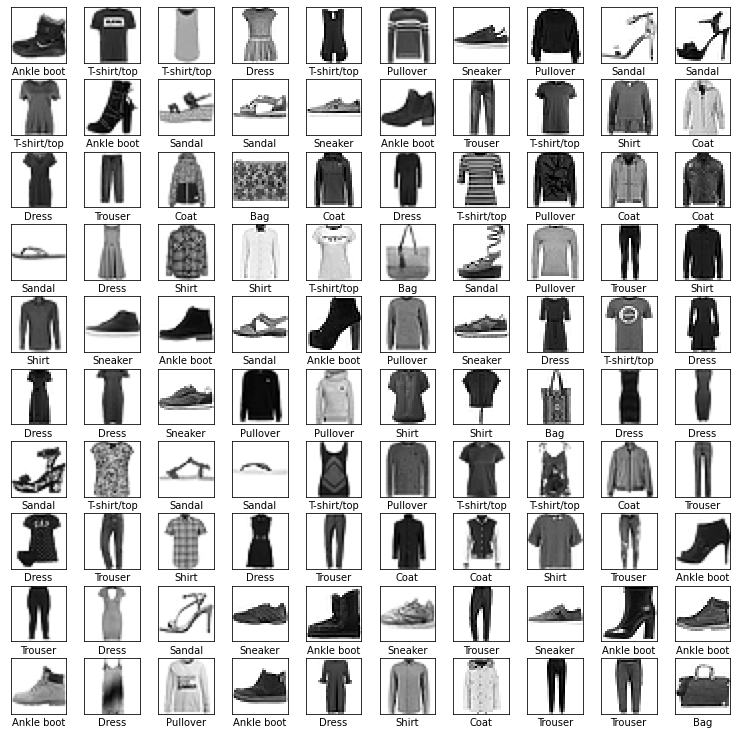

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# ラベルに割り当てられたアイテム名を登録
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(13, 13))
# 訓練データから100枚抽出してプロットする
for i in range(100):
    # 10 * 10で出力
    plt.subplot(10, 10, i + 1)
    # 縦方向の間隔を空ける
    plt.subplots_adjust(hspace=0.3)
    # 軸メモリを非表示にする
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # カラーマップにグレースケールを設定してプロット
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # x軸らべるにアイテム名に出力
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [19]:
# 訓練データを行列に変換し、個々のデータを0.01から1000の範囲に変換し、シフトして0をなくす
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# (60000, 28, 28)の3階テンソルを(60000, 784)の2階テンソルに変換
x_train = x_train.reshape(60000, 784)
# データを255で割って、0.99をかけた後0.01を加えてシフトする
x_train = (x_train / 255.0 * 0.99) + 0.01

In [20]:
# 正解ラベルをOne-Hot表現の配列にする
# 出力層ニューロンの数
output_neurons = 10
# 出力層のニューロン数に合わせて0.01で初期化して配列を作成
target = np.zeros(output_neurons) + 0.01
# 正解ラベル（3）に対応する4番目の要素を0.99にする
target[3] = 0.99
print(target)

[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]


In [21]:
# Fashion-MNISTデータセットの読み込みと前処理
'''
Fashion-MNISTを読み込んで前処理を行う
'''
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# (60000, 28, 28)の3階テンソルを(60000, 784)の2階テンソルに変換
x_train = x_train.reshape(60000, 784)
# データを255で割って、0.99をかけた後0.01を加えてシフトする
x_train = (x_train / 255.0 * 0.99) + 0.01

In [29]:
'''
学習を行う
'''
input_neurons = 784
hidden_neurons = 256
output_neurons = 10
learning_rate = 0.1

# neuralNetworkクラスのインスタンス化
n = neuralNetwork(
    input_neurons,
    hidden_neurons,
    output_neurons,
    learning_rate
)

# ニューラルネットワークの学習
epochs = 20 # 学習を繰り返す回数

# 指定した回数だけ学習を繰り返す
for e in range(epochs):
    # 画像データと正解ラベルを1セットずつ取り出す
    for (x, y) in zip(x_train, y_train):
        # 出力層のニューロン数を要素数とするOne-Hotベクトルを作成
        target = np.zeros(output_neurons) + 0.01
        # 正解ラベルに対応する要素を0.99にする
        target[int(y)] = 0.99
        # 画像データと正解ラベルの1セットを引数にしてtrain()を実行
        n.train(
            x,
            target
        )
    print('completed:', e+1)

completed: 1
completed: 2
completed: 3
completed: 4
completed: 5
completed: 6
completed: 7
completed: 8
completed: 9
completed: 10
completed: 11
completed: 12
completed: 13
completed: 14
completed: 15
completed: 16
completed: 17
completed: 18
completed: 19
completed: 20


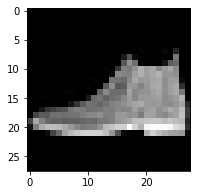

9


In [31]:
'''
テストデータの画像と正解ラベルを出力
'''
plt.figure(figsize=(3, 3))
plt.gray()
plt.imshow(x_test[0])
plt.show()
print(y_test[0])

In [32]:
'''
学習済みモデルの検証
'''
# 画像データのフラット化
# (10000, 28, 28)の3階テンソルを(10000, 784)の2階テンソルに変換
x_test = x_test.reshape(10000, 784)
# データを255で割って0.99をかけた後0.01を加えてシフトする
x_test = (x_test / 255.0 * 0.99) + 0.01
# 正解は1、不正解は0を格納するリスト
score = []

# x_test, y_testから1データ抽出してx, yに格納
for (x, y) in zip(x_test, y_test):
    # 学習済みモデルで評価する
    outputs = n.evaluate(x)
    # 出力層のニューロン数にあわせて正解の配列を作成
    targets = np.zeros(output_neurons) + 0.01
    # 正解値に対応する要素を0.99にする
    targets[int(y)] = 0.99
    # 出力の行列の最大値のインデクスが予測するアイテムに対応
    label = np.argmax(outputs)
    # ネットワークの出力と正解ラベルを比較
    if (label == y):
        score.append(1)
    else:
        score.append(0)

In [33]:
'''
正誤記録を出力する
'''
result = ['○' if i == 1 else '●' for i in score]
print(result)

['○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '●', '○', '○', '○', '○', '○', '●', '●', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '●', '●', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '●', '○', '○', '●', '○', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '○', '○', '○', '○', '●', '○', '○', '○', '○', '○', '○',

In [34]:
'''
精度を求める
'''
# 配列scoreをNumpy配列に変換
score_array = np.asarray(score)
# score_arrayの合計をscore_arrayの要素数で割って精度を求める
print('performance = ', score_array.sum() / score_array.size)

performance =  0.8783


### TensorFlowスタイルによるニューラルネットワークの構築

In [36]:
'''
1. データセットの読み込みと前処理
'''
# tensorflowのインポート
import tensorflow as tf

# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# (28, 28)の画像データを(784)のベクトルに変換して正規化を行う
# (60000, 28, 28)の訓練データを(60000, 784)の2階テンソルに変換
x_train = x_train.reshape(-1, 784)
# 訓練データをfloat32(浮動小数点)型に255で割ってスケール変換する
x_train = x_train.astype('float32') / 255

# (10000, 28, 28)のテストデータを(10000, 784)の2階テンソルに変換
x_test = x_test.reshape(-1, 784)
# テストデータをfloat32(浮動小数点)型に255で割ってスケール変換する
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# 正解ラベルのOne-Hotエンコーディング
# クラスの数
class_num = 10
# 訓練データの正解ラベルをOne-Hot表現に変換
y_train = tf.keras.utils.to_categorical(y_train, class_num)
# テストデータの正解ラベルをOne-Hot表現に変換
y_test = tf.keras.utils.to_categorical(y_test, class_num)
print('----------------------------')
print('y_train[0] :', y_train[0])
print('y_test[0] :', y_test[0])
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
----------------------------
y_train[0] : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_test[0] : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_train.shape : (60000, 10)
y_test.shape : (10000, 10)


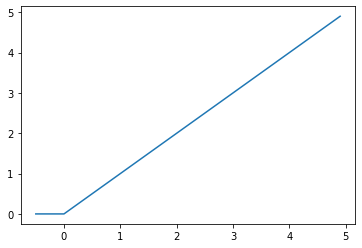

In [38]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-0.5, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

In [39]:
'''
2. モデルの定義
'''
class MLP(tf.keras.Model):
    '''
    多層パーセプトロン
    Attribures:
        l1(Dense): 隠れ層
        l2(Dense): 出力層
    '''
    def __init__(self, hidden_dim, output_dim):
        '''
        Parameters:
            hidden_dim(int): 隠れ層のユニット数（次元）
            output_dim(int): 出力層のユニット数（次元）
        '''
        super().__init__()
        # 隠れ層・活性化関数はRelu
        self.fc1 = tf.keras.layers.Dense(hidden_dim, activation='relu')
        # 出力層・活性化関数はソフトマックス
        self.fc2 = tf.keras.layers.Dense(output_dim, activation='softmax')
    
    @tf.function
    def call(self, x, training=None):
        '''
        MLPのインスタンスからコールバックされる関数
        Parameters:
            x(ndarray(float32)): 訓練データまたは検証データ
        Returns(float32): MLPの出力として要素数3の1階テンソル
        '''
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [40]:
'''
3. 損失関数とオプティマイザーの生成
'''
# マルチクラス分類のクロスエントロピー誤差を求めるオブジェクト
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

In [41]:
'''
4. 勾配降下アルゴリズムによるパラメーターの更新処理を行うtrain_step()関数
'''
# 損失を記録するオブジェクトを生成
train_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
train_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def train_step(x, t):
    '''
    学習を1回行う
    Parameters:
        x(ndarray(float32)): 訓練データ
        t(ndarray(float32)): 正解ラベル
    Returns:
        ステップごとのクロスエントロピー誤差
    '''
    # 自動微分による勾配計算を記録するブロック
    with tf.GradientTape() as tape:
        # 訓練データをTrueに指定し
        # モデルに入力して順伝播の出力値を取得
        outputs = model(x, training=True)
        # 出力値と正解ラベルの誤差
        tmp_loss = loss_fn(t, outputs)
    
    # tapeに記録された操作を使用して誤差の勾配を計算
    grads = tape.gradient(
        # 現在のステップの誤差
        tmp_loss,
        # バイアス、重みのリストを取得
        model.trainable_variables
    )
    # 勾配降下法の更新式を適用してバイアス、重みを更新
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 損失をMeanオブジェクトに記録
    train_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    train_accuracy(t, outputs)

In [42]:
'''
5. 検証を行うvalid_step()関数
'''
# 損失を記録するオブジェクトを生成
val_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
val_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def valid_step(val_x, val_y):
    # 訓練データをFalseに指定し
    # モデルに入力して順伝播の出力値を取得
    pred = model(val_x, training=False)
    # 出力値と正解ラベルの誤差
    tmp_loss = loss_fn(val_y, pred)
    # 損失をMeanオブジェクトに記録
    val_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    val_accuracy(val_y, pred)

In [43]:
'''
6. 学習の進捗を監視し早期終了判定を行うクラス
'''
class EarlyStopping:
    def __init__(self, patience=1.0, verbose=0):
        '''
        Parameters:
            patience(int): 監視するエポック数
            verbose(int): 早期終了メッセージの出力フラグ
        '''
        # インスタンス変数の初期化
        # 監視中のエポック数のカウンターを初期化
        self.epoch = 0
        # 比較対象の損失を無限大'inf'で初期化
        self.pre_loss = float('inf')
        # 監視対象のエポック数をパラメータで初期化
        self.patience = patience
        # 早期終了メッセージの出力フラグをパラメータで初期化
        self.verbose = verbose
    
    def __call__(self, current_loss):
        '''
        Parameters:
            current_loss(float): 1エポック終了後の検証データの損失
        Returns:
            True: 監視回数の上限までに前エポックの損失を超えた場合
            False: 監視回数の上限までに前エポックの損失を超えない場合
        '''
        # 前エポックの損失より大きくなった場合
        if self.pre_loss < current_loss:
            # カウンターを1増やす
            self.epoch += 1
            # 監視回数の上限に達した場合
            if self.epoch > self.patience:
                # 早期終了メッセージの出力フラグが1の場合
                if self.verbose:
                    # メッセージを出力
                    print('early stopping')
                # 学習を終了するTrueを返す
                return True
        # 前エポックの損失以下の場合
        else:
            # カウンターを0に戻す
            self.epoch = 0
            # 損失の値を更新する
            self.pre_loss = current_loss
        
        # 監視回数の上限までに前エポックの損失を超えなければFalseを返して
        # 前エポックの損失を上回るが監視関数の範囲内であれば
        # Falseを返す必要があるので、return文の位置をここであることに注意
        return False

In [44]:
'''
7. 訓練データと検証データの用意
'''
from sklearn.model_selection import train_test_split

# 訓練データと検証データに8:2の割合で分割
tr_x, val_x, tr_y, val_y = train_test_split(x_train, y_train, test_size=0.2)
print(tr_x.shape)
print(val_x.shape)
print(tr_y.shape)
print(val_y.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [45]:
'''
8. モデルを生成して学習する
'''
from sklearn.utils import shuffle

# エポック数
epochs = 100
# ミニバッチのサイズ
batch_size = 64
# 訓練データのステップ数
tr_steps = tr_x.shape[0] // batch_size
# 検証データのステップ数
val_steps = val_x.shape[0] // batch_size

# 隠れ層256ユニット、出力層10ユニットのモデルを生成
model = MLP(256, 10)
# 損失と精度の履歴を保存するためにdictオブジェクト
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': [],
}

# 早期終了の判定を行うオブジェクトを生成
ers = EarlyStopping(patience=5, verbose=1)

# 学習を行う
for epoch in range(epochs):
    # 学習するたびに記録された値をリセット
    train_loss.reset_states()
    train_accuracy.reset_states()
    val_loss.reset_states()
    val_accuracy.reset_states()

    # 訓練データと正解ラベルをシャッフル
    x_, y_ = shuffle(tr_x, tr_y, )

    # 1ステップにおける訓練用ミニバッチを使用した学習
    for step in range(tr_steps):
        start = step * batch_size
        end = start + batch_size
        # ミニバッチでバイアス、重みを更新して誤差を取得
        train_step(x_[start:end], y_[start:end])
    
    # 1ステップにおける検証用ミニバッチを使用した評価
    for step in range(val_steps):
        start = step * batch_size
        end = start + batch_size
        # ミニバッチでバイアス、重みを更新して誤差を取得
        valid_step(val_x[start:end], val_y[start:end])
    
    avg_train_loss = train_loss.result()
    avg_train_acc = train_accuracy.result()
    avg_val_loss = val_loss.result()
    avg_val_acc = val_accuracy.result()

    # 損失を履歴を保存する
    history['loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    # 精度を履歴を保存する
    history['accuracy'].append(avg_train_acc)
    history['val_accuracy'].append(avg_val_acc)

    # 1エポックごとに結果を出力
    if (epoch + 1) % 1 == 0:
        print(
            'epoch({}) train_loss: {:.4} train_acc {:.4} val_loss {:.4} val_acc {:.4}'
            .format(
                epoch + 1,
                avg_train_loss,
                avg_train_acc,
                avg_val_loss,
                avg_val_acc,
            )
        )

    # 検証データの損失をEarlyStoppingオブジェクトに達して早期終了を判定
    if ers(val_loss.result()):
        # 監視対象のエポックで損失が改善されなければ学習を終了
        break
model.summary()

epoch(1) train_loss: 0.6055 train_acc 0.7897 val_loss 0.4584 val_acc 0.8343
epoch(2) train_loss: 0.4398 train_acc 0.8431 val_loss 0.3958 val_acc 0.8628
epoch(3) train_loss: 0.3944 train_acc 0.8573 val_loss 0.4005 val_acc 0.8558
epoch(4) train_loss: 0.3671 train_acc 0.8668 val_loss 0.3815 val_acc 0.857
epoch(5) train_loss: 0.3476 train_acc 0.8733 val_loss 0.348 val_acc 0.878
epoch(6) train_loss: 0.3318 train_acc 0.88 val_loss 0.3399 val_acc 0.8771
epoch(7) train_loss: 0.3184 train_acc 0.8835 val_loss 0.3416 val_acc 0.876
epoch(8) train_loss: 0.3056 train_acc 0.8884 val_loss 0.3381 val_acc 0.8752
epoch(9) train_loss: 0.2949 train_acc 0.8928 val_loss 0.3354 val_acc 0.8833
epoch(10) train_loss: 0.287 train_acc 0.8963 val_loss 0.3209 val_acc 0.8821
epoch(11) train_loss: 0.279 train_acc 0.898 val_loss 0.3131 val_acc 0.8884
epoch(12) train_loss: 0.2713 train_acc 0.9011 val_loss 0.3245 val_acc 0.8788
epoch(13) train_loss: 0.2648 train_acc 0.9029 val_loss 0.3334 val_acc 0.8752
epoch(14) train_l

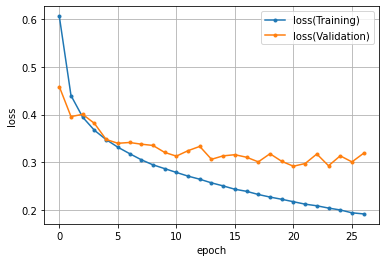

In [46]:
''''
9. 損失の推移をグラフにする
'''
# 訓練データの損失
plt.plot(
    history['loss'],
    marker='.',
    label='loss(Training)'
)
# 検証データの損失
plt.plot(
    history['val_loss'],
    marker='.',
    label='loss(Validation)'
)
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

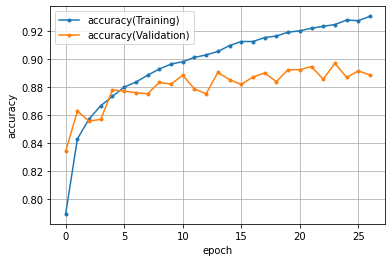

In [47]:
'''
10.　精度の推移をグラフにする
'''
# 訓練データの精度
plt.plot(
    history['accuracy'],
    marker='.',
    label='accuracy(Training)'
)
# 検証データの精度
plt.plot(
    history['val_accuracy'],
    marker='.',
    label='accuracy(Validation)'
)
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [49]:
'''
11. テストデータによるモデルの評価
'''
# テストデータの予測値を取得
test_preds = model(x_test)
# カテゴリカルデータの精度を取得するオブジェクト
categor_acc = tf.keras.metrics.CategoricalAccuracy()
# 精度を測定するデータを設定
categor_acc.update_state(y_test, test_preds)
# テストデータの精度を取得
test_acc = categor_acc.result().numpy()
# テストデータの損失を取得
test_loss = loss_fn(y_test, test_preds)

print(
    'test_loss: {:.4f}, test_acc: {:.4f}'
    .format(
        test_loss,
        test_acc
    )
)

test_loss: 0.3500, test_acc: 0.8830


### 隠れ層の出力にドロップアウトを適用する

In [50]:
'''
2. モデルの定義
'''
class MLP(tf.keras.Model):
    '''
    多層パーセプトロン
    Attribures:
        l1(Dense): 隠れ層
        l2(Dense): 出力層
    '''
    def __init__(self, hidden_dim, output_dim):
        '''
        Parameters:
            hidden_dim(int): 隠れ層のユニット数（次元）
            output_dim(int): 出力層のユニット数（次元）
        '''
        super().__init__()
        # 隠れ層・活性化関数はRelu
        self.fc1 = tf.keras.layers.Dense(hidden_dim, activation='relu')
        # ドロップアウト
        self.dropput1 = tf.keras.layers.Dropout(0.5)
        # 出力層・活性化関数はソフトマックス
        self.fc2 = tf.keras.layers.Dense(output_dim, activation='softmax')
    
    @tf.function
    def call(self, x, training=None):
        '''
        MLPのインスタンスからコールバックされる関数
        Parameters:
            x(ndarray(float32)): 訓練データまたは検証データ
        Returns(float32): MLPの出力として要素数3の1階テンソル
        '''
        x = self.fc1(x)
        if training:
            x = self.dropput1(x)
        x = self.fc2(x)
        return x

In [51]:
'''
3. 損失関数とオプティマイザーの生成
'''
# マルチクラス分類のクロスエントロピー誤差を求めるオブジェクト
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

In [52]:
'''
4. 勾配降下アルゴリズムによるパラメーターの更新処理を行うtrain_step()関数
'''
# 損失を記録するオブジェクトを生成
train_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
train_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def train_step(x, t):
    '''
    学習を1回行う
    Parameters:
        x(ndarray(float32)): 訓練データ
        t(ndarray(float32)): 正解ラベル
    Returns:
        ステップごとのクロスエントロピー誤差
    '''
    # 自動微分による勾配計算を記録するブロック
    with tf.GradientTape() as tape:
        # 訓練データをTrueに指定し
        # モデルに入力して順伝播の出力値を取得
        outputs = model(x, training=True)
        # 出力値と正解ラベルの誤差
        tmp_loss = loss_fn(t, outputs)
    
    # tapeに記録された操作を使用して誤差の勾配を計算
    grads = tape.gradient(
        # 現在のステップの誤差
        tmp_loss,
        # バイアス、重みのリストを取得
        model.trainable_variables
    )
    # 勾配降下法の更新式を適用してバイアス、重みを更新
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 損失をMeanオブジェクトに記録
    train_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    train_accuracy(t, outputs)

In [53]:
'''
5. 検証を行うvalid_step()関数
'''
# 損失を記録するオブジェクトを生成
val_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
val_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def valid_step(val_x, val_y):
    # 訓練データをFalseに指定し
    # モデルに入力して順伝播の出力値を取得
    pred = model(val_x, training=False)
    # 出力値と正解ラベルの誤差
    tmp_loss = loss_fn(val_y, pred)
    # 損失をMeanオブジェクトに記録
    val_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    val_accuracy(val_y, pred)

In [54]:
'''
6. 学習の進捗を監視し早期終了判定を行うクラス
'''
class EarlyStopping:
    def __init__(self, patience=1.0, verbose=0):
        '''
        Parameters:
            patience(int): 監視するエポック数
            verbose(int): 早期終了メッセージの出力フラグ
        '''
        # インスタンス変数の初期化
        # 監視中のエポック数のカウンターを初期化
        self.epoch = 0
        # 比較対象の損失を無限大'inf'で初期化
        self.pre_loss = float('inf')
        # 監視対象のエポック数をパラメータで初期化
        self.patience = patience
        # 早期終了メッセージの出力フラグをパラメータで初期化
        self.verbose = verbose
    
    def __call__(self, current_loss):
        '''
        Parameters:
            current_loss(float): 1エポック終了後の検証データの損失
        Returns:
            True: 監視回数の上限までに前エポックの損失を超えた場合
            False: 監視回数の上限までに前エポックの損失を超えない場合
        '''
        # 前エポックの損失より大きくなった場合
        if self.pre_loss < current_loss:
            # カウンターを1増やす
            self.epoch += 1
            # 監視回数の上限に達した場合
            if self.epoch > self.patience:
                # 早期終了メッセージの出力フラグが1の場合
                if self.verbose:
                    # メッセージを出力
                    print('early stopping')
                # 学習を終了するTrueを返す
                return True
        # 前エポックの損失以下の場合
        else:
            # カウンターを0に戻す
            self.epoch = 0
            # 損失の値を更新する
            self.pre_loss = current_loss
        
        # 監視回数の上限までに前エポックの損失を超えなければFalseを返して
        # 前エポックの損失を上回るが監視関数の範囲内であれば
        # Falseを返す必要があるので、return文の位置をここであることに注意
        return False

In [55]:
'''
7. 訓練データと検証データの用意
'''
from sklearn.model_selection import train_test_split

# 訓練データと検証データに8:2の割合で分割
tr_x, val_x, tr_y, val_y = train_test_split(x_train, y_train, test_size=0.2)
print(tr_x.shape)
print(val_x.shape)
print(tr_y.shape)
print(val_y.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [56]:
'''
8. モデルを生成して学習する
'''
from sklearn.utils import shuffle

# エポック数
epochs = 100
# ミニバッチのサイズ
batch_size = 64
# 訓練データのステップ数
tr_steps = tr_x.shape[0] // batch_size
# 検証データのステップ数
val_steps = val_x.shape[0] // batch_size

# 隠れ層256ユニット、出力層10ユニットのモデルを生成
model = MLP(256, 10)
# 損失と精度の履歴を保存するためにdictオブジェクト
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': [],
}

# 早期終了の判定を行うオブジェクトを生成
ers = EarlyStopping(patience=5, verbose=1)

# 学習を行う
for epoch in range(epochs):
    # 学習するたびに記録された値をリセット
    train_loss.reset_states()
    train_accuracy.reset_states()
    val_loss.reset_states()
    val_accuracy.reset_states()

    # 訓練データと正解ラベルをシャッフル
    x_, y_ = shuffle(tr_x, tr_y, )

    # 1ステップにおける訓練用ミニバッチを使用した学習
    for step in range(tr_steps):
        start = step * batch_size
        end = start + batch_size
        # ミニバッチでバイアス、重みを更新して誤差を取得
        train_step(x_[start:end], y_[start:end])
    
    # 1ステップにおける検証用ミニバッチを使用した評価
    for step in range(val_steps):
        start = step * batch_size
        end = start + batch_size
        # ミニバッチでバイアス、重みを更新して誤差を取得
        valid_step(val_x[start:end], val_y[start:end])
    
    avg_train_loss = train_loss.result()
    avg_train_acc = train_accuracy.result()
    avg_val_loss = val_loss.result()
    avg_val_acc = val_accuracy.result()

    # 損失を履歴を保存する
    history['loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    # 精度を履歴を保存する
    history['accuracy'].append(avg_train_acc)
    history['val_accuracy'].append(avg_val_acc)

    # 1エポックごとに結果を出力
    if (epoch + 1) % 1 == 0:
        print(
            'epoch({}) train_loss: {:.4} train_acc {:.4} val_loss {:.4} val_acc {:.4}'
            .format(
                epoch + 1,
                avg_train_loss,
                avg_train_acc,
                avg_val_loss,
                avg_val_acc,
            )
        )

    # 検証データの損失をEarlyStoppingオブジェクトに達して早期終了を判定
    if ers(val_loss.result()):
        # 監視対象のエポックで損失が改善されなければ学習を終了
        break
model.summary()

epoch(1) train_loss: 0.6798 train_acc 0.7599 val_loss 0.4822 val_acc 0.8262
epoch(2) train_loss: 0.5009 train_acc 0.8201 val_loss 0.4085 val_acc 0.8511
epoch(3) train_loss: 0.4583 train_acc 0.837 val_loss 0.3793 val_acc 0.8637
epoch(4) train_loss: 0.4341 train_acc 0.8431 val_loss 0.3691 val_acc 0.8664
epoch(5) train_loss: 0.4173 train_acc 0.8488 val_loss 0.3593 val_acc 0.8707
epoch(6) train_loss: 0.4015 train_acc 0.8557 val_loss 0.3557 val_acc 0.8699
epoch(7) train_loss: 0.3887 train_acc 0.8585 val_loss 0.3424 val_acc 0.8745
epoch(8) train_loss: 0.3797 train_acc 0.8623 val_loss 0.3311 val_acc 0.8783
epoch(9) train_loss: 0.3732 train_acc 0.8638 val_loss 0.3304 val_acc 0.8807
epoch(10) train_loss: 0.3634 train_acc 0.8693 val_loss 0.336 val_acc 0.8749
epoch(11) train_loss: 0.3575 train_acc 0.87 val_loss 0.3345 val_acc 0.8768
epoch(12) train_loss: 0.3511 train_acc 0.8718 val_loss 0.3151 val_acc 0.8823
epoch(13) train_loss: 0.3479 train_acc 0.8733 val_loss 0.319 val_acc 0.8834
epoch(14) tra

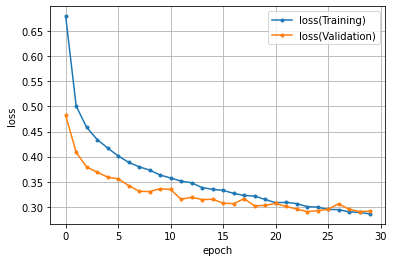

In [57]:
''''
9. 損失の推移をグラフにする
'''
# 訓練データの損失
plt.plot(
    history['loss'],
    marker='.',
    label='loss(Training)'
)
# 検証データの損失
plt.plot(
    history['val_loss'],
    marker='.',
    label='loss(Validation)'
)
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

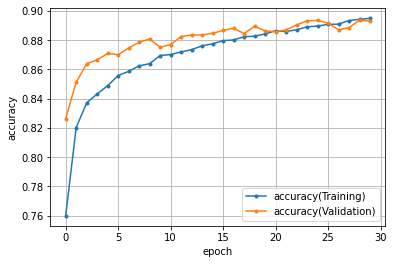

In [58]:
'''
10.　精度の推移をグラフにする
'''
# 訓練データの精度
plt.plot(
    history['accuracy'],
    marker='.',
    label='accuracy(Training)'
)
# 検証データの精度
plt.plot(
    history['val_accuracy'],
    marker='.',
    label='accuracy(Validation)'
)
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [59]:
'''
11. テストデータによるモデルの評価
'''
# テストデータの予測値を取得
test_preds = model(x_test)
# カテゴリカルデータの精度を取得するオブジェクト
categor_acc = tf.keras.metrics.CategoricalAccuracy()
# 精度を測定するデータを設定
categor_acc.update_state(y_test, test_preds)
# テストデータの精度を取得
test_acc = categor_acc.result().numpy()
# テストデータの損失を取得
test_loss = loss_fn(y_test, test_preds)

print(
    'test_loss: {:.4f}, test_acc: {:.4f}'
    .format(
        test_loss,
        test_acc
    )
)

test_loss: 0.3328, test_acc: 0.8809
